# Assignment 5 - Data Crawling from Website

이번 과제에서 학생들은 웹사이트에서 데이터를 수집하고 원하는 형태로 정리하는 연습을 하게될 것이다.

* 파일 이름: A5-학번-이름(영어로).zip 형식으로 (예: A5-13403-999-jiyoon.zip)

## 1. 미디어다음에서 제공하는 영어사전 웹사이트에서 랜돔으로 100개의 단어를 수집하고, 단어와 단어의 의미를 보기 좋게 출력하시오.

예: http://dic.daum.net/word/view.do?wordid=ekw000078303&q=help


* 저장 형식은 자유. 단, 가능한 한 보기 좋게 내용을 편집하여 저장하자.

  예)
  
    단어 1 
      1. 뜻풀이  
      2. 뜻풀이 
    ===  
    단어 2 
      1. 뜻풀이

In [59]:
from bs4 import BeautifulSoup
import urllib.request
import random

def mingu( URL ):
    sourcecode = urllib.request.urlopen(URL)
    soup = BeautifulSoup(sourcecode, 'lxml', from_encoding='utf-8')
    text1 = soup.find("span", {"class":"txt_cleanword"}).get_text()
    text1 = text1.replace("\n",'')
    text2 = soup.find("ul", {"class":"list_mean"}).get_text()
    text2 = text2.replace("\n",'')
    text2 = text2.replace(" ",'')
    return text1, text2

# URL = 'http://dic.daum.net/word/view.do?wordid=ekw000078303'
# mingu( URL = "http://dic.daum.net/word/view.do?wordid=ekw000078303")

file_mingu = open("result_word.txt","a")
file_mingu.write("Random Word Dictionary" + "\n" + "\n")
for i in range(0, 100):
    URL_random = "http://dic.daum.net/word/view.do?wordid=ekw" + str('%09d' % random.randint(1, 387190))
    text1 = mingu(URL = URL_random)[0]
    text2 = mingu(URL = URL_random)[1]
    file_mingu.write(str(i+1) + ". " + text1 + "\n")
    file_mingu.write("\t" + text2 + "\n")
    file_mingu.write("-----------------------------------" + "\n")
file_mingu.close()

# URL_random = "http://dic.daum.net/word/view.do?wordid=ekw" + str('%09d' % random.randint(1, 387190))
# mingu(URL = URL_random)

## 2. 트위터에서 키워드를 중심으로 데이터를 수집하고 텍스트를 분석하자.

* 텍스트 분석은 frequency, co-occurrence 등 지난 시간에 다루었던 것들을 이용해 보자.
* 이번 과제는 
    * 트위터 수집 코드
    * 수집된 데이터
    * 수집된 데이터를 분석하는 코드
    
    등으로 이루어질 것이다. 모든 결과물을 zip으로 압축해서 제출한다.
* 이번 과제는 굳이 jupyter notebook의 형태로 제출하지 않아도 된다. 아마 jupyter notebook을 사용한다면 <수집된 데이터를 분석하는 코드> 정도가 있을 것이다.

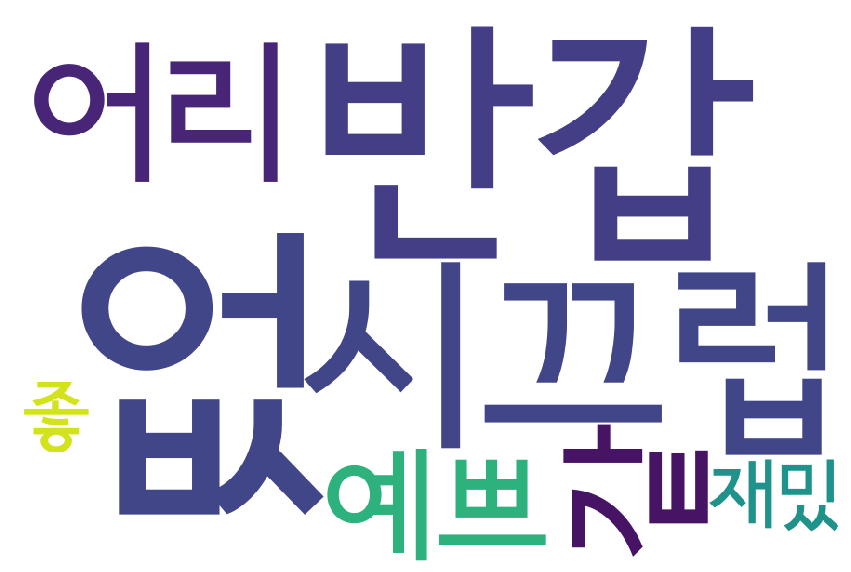

In [2]:
from konlpy.tag import Komoran
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from collections import Counter

with open("result_data_twitter.txt") as file:
    data = file.readlines()
stringdata = str(data)
fixeddata = stringdata.split("\'")
fixeddata
mingudata = []
for i in fixeddata:
    if 'RT' in i:
        if i not in mingudata:
            mingudata.append(i)
            
tagger = Komoran()
tagged_sentences1=[]
for sent in mingudata:
    tagged_sentences1.append(tagger.pos(sent))
    
tagged_sentences1
va_list1 = []
for sent in tagged_sentences1:    
    for word, tag in sent:
        if tag == 'VA':
            va_list1.append(word)

va_counts1 = Counter(va_list1)
            
cloud1 = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')
cloud1 = cloud1.fit_words(va_counts1)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud1)
plt.show()